In [9]:
import math
y_pred = [1, 1.5, 2, 2.5, 3] 
y_true = [2, 2.5, 3, 3.5, 4]
s = 0
for i in range(len(y_pred)):
    s += (y_true[i] - y_pred[i]) ** 2
print(math.sqrt(s / len(y_true)))

1.0


In [10]:
math.sqrt((((2 - 1) ** 2) + ((2.5 - 1.5) ** 2) + ((3 - 2) ** 2) + ((3.5 - 2.5) ** 2) + ((4 - 3) ** 2))/5)

1.0

In [1]:
import lightfm
import pandas as pd
all_ratings = pd.read_csv('./u.data', sep='\t', header=None)
all_ratings.columns = ['user_id', 'item_id', 'rating', 'timestamp']
all_ratings.user_id = all_ratings.user_id - 1
all_ratings.item_id = all_ratings.item_id - 1
all_ratings

D:\anaconda_3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


,user_id,item_id,rating,timestamp
0,195,241,3,881250949
1,185,301,3,891717742
2,21,376,1,878887116
3,243,50,2,880606923
4,165,345,1,886397596
...,...,...,...,...
99995,879,475,3,880175444
99996,715,203,5,879795543
99997,275,1089,1,874795795
99998,12,224,2,882399156


In [2]:
train = pd.read_csv('./ua.base', sep="\t", header=None)
train.columns = ['user_id', 'item_id', 'rating', 'timestamp']
train.user_id = train.user_id - 1
train.item_id = train.item_id - 1

In [3]:
test = pd.read_csv('./ua.test', sep="\t", header=None)
test.columns = ['user_id', 'item_id', 'rating', 'timestamp']
test.user_id = test.user_id - 1
test.item_id = test.item_id - 1

In [4]:
all_ratings = all_ratings.drop(['timestamp'], axis=1)
train = train.drop(['timestamp'], axis=1)
test = test.drop(['timestamp'], axis=1)

In [5]:
from lightfm.data import Dataset
import numpy as np
dataset = Dataset()
dataset.fit(users=np.unique(all_ratings['user_id']), items=np.unique(all_ratings['item_id']))

In [6]:
_, interactions_train = dataset.build_interactions([tuple(i) for i in train.to_numpy()])
_, interactions_test = dataset.build_interactions([tuple(i) for i in test.to_numpy()])

In [7]:
def RMSE(test, model):
    y_pred = model.predict(test.user_id.values, test.item_id.values)
    y_true = test.rating
    s = 0
    for i in range(len(y_pred)):
        s += (y_true[i] - y_pred[i]) ** 2
    return math.sqrt(s / len(y_true))

In [10]:
from lightfm import LightFM
epoch = [x for x in range(0, 210, 10)]
model = LightFM(no_components=100, random_state=42)
train_res = []
test_res = []
for e in epoch:
    model.fit(interactions_train, epochs=e)
    train_res.append(RMSE(train, model))
    test_res.append(RMSE(test, model))
    print(e)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [21]:
print(epoch[train_res.index(min(train_res))])# optimal epochs count is 10
print(epoch[test_res.index(min(test_res))])

10
10


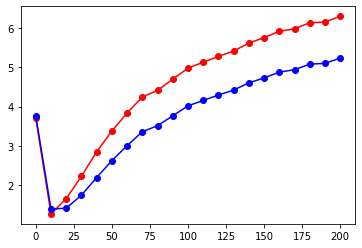

In [23]:
import matplotlib.pyplot as plt
plt.plot(epoch, train_res, marker='o', color='red')
plt.plot(epoch, test_res, marker='o', color='blue')